# Overfitting Demo
## Purpose
Illustrate the issues of overfitting

In [37]:
# Initialize all our libraries

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
# If you have issues with sklearn.model_selection, use the line below
# from sklearn.cross_validation import cross_val_score

In [38]:
# Import some random, but deterministic data

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [39]:
# Let's fit a straight line through our data with regression model.

# Set the degree of the polynomial
polydegree = 1

# Create the features
polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X[:, np.newaxis],y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

(0, 1)

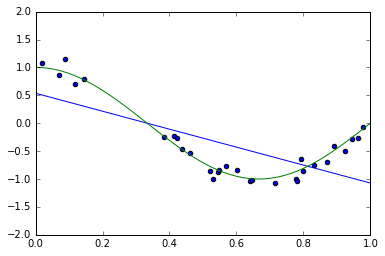

In [40]:
# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [ ]:
# We see that our line fits the general trend but the overal fit is quite bad. Let's do this again with second order.

In [41]:
# Let's fit a degree 2 polynomial through our data with regression model.
polydegree = 2

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X[:, np.newaxis],y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

(0, 1)

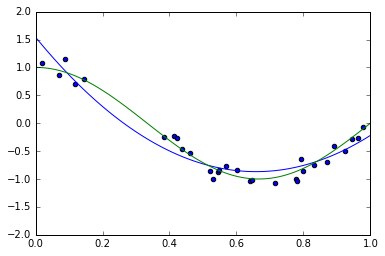

In [42]:
# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [ ]:
# We see our data fit gets a lot better. Most of us can see this is a degree 3 polynomial so let's fit that

(0, 1)

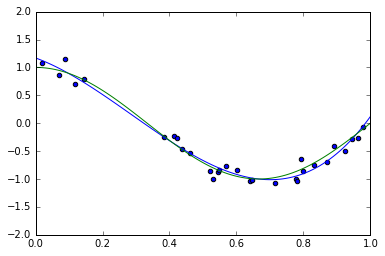

In [44]:
polydegree = 3

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X[:, np.newaxis],y)

# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [ ]:
# This looks much better. Why not keep adding degrees?

(0, 1)

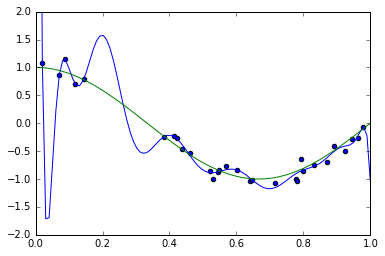

In [45]:
polydegree = 15

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X[:, np.newaxis],y)

# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [ ]:
# Something is clearly wrong here. We are no longer fitter the true data. 
# We are now overfitting because we fail to represent the true trend